<a href="https://colab.research.google.com/github/STUPIDNAMEFORASTUPIDUSER/STUPIDNAMEFORASTUPIDUSER/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%2231_4_%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%8F%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Установка и импорт библиотек

In [ ]:
!pip install openai llama_index

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.0/189.0 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [ ]:
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader # для загрузки файла и его векторизации
from llama_index.core.postprocessor import LLMRerank # модуль реранжирования на базе LLM
# Поддержка эмбеддингов и моделей от OpenAI
import openai
from llama_index.embeddings.openai import OpenAIEmbedding
from llama_index.llms.openai import OpenAI
from llama_index.core import Settings # настройка глобальных параметров фреймворка

In [ ]:
import getpass # для работы с паролями
import os      # для работы с окружением и файловой системой

# Запрос ввода ключа от OpenAI
os.environ["OPENAI_API_KEY"] = getpass.getpass("Введите OpenAI API Key:")

Введите OpenAI API Key:··········


In [ ]:
# # Устанавливаем глобальные настройки по умолчанию
# # LLM (gpt-3.5-turbo)
# Settings.llm = OpenAI(model_name="gpt-3.5-turbo", temperature=0.1, request_timeout=1000, max_retries=3) # LLM по умолчанию

# Settings.chunk_size = 512 # размер чанков, на которые разбиваем документ

# Подключаем трассировку


In [ ]:
!pip install "arize-phoenix[evals,llama-index]" gcsfs nest-asyncio "openinference-instrumentation-llama-index>=2.0.0"

INFO: pip is looking at multiple versions of llama-index-llms-openai to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of llama-index-llms-openai to determine which version is compatible with other requirements. This could take a while.
  Using cached llama_index_embeddings_openai-0.2.5-py3-none-any.whl.metadata (686 bytes)
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
  Using cached llama_index_agent_openai-0.3.4-py3-none-any.whl.metadata (728 bytes)
INFO: pip is looking at multiple versions of llama-index-indices-managed-llama-cloud to determine which version is compatible with other requirements. This could take a while.
  Using cached llama_index_multi_modal_llms_openai-0.2.3-py3-none-any.whl.metadata 

In [ ]:
import nest_asyncio
import phoenix as px

from phoenix.evals import (
    HallucinationEvaluator,
    OpenAIModel,
    QAEvaluator,
    RelevanceEvaluator,
    run_evals,
)
from phoenix.session.evaluation import get_qa_with_reference, get_retrieved_documents
from phoenix.trace import DocumentEvaluations, SpanEvaluations

nest_asyncio.apply()

In [ ]:
from openinference.instrumentation.llama_index import LlamaIndexInstrumentor
from opentelemetry.exporter.otlp.proto.http.trace_exporter import OTLPSpanExporter
from opentelemetry.sdk.trace import TracerProvider
from opentelemetry.sdk.trace.export import SimpleSpanProcessor

endpoint = "http://127.0.0.1:6006/v1/traces"
tracer_provider = TracerProvider()
tracer_provider.add_span_processor(SimpleSpanProcessor(OTLPSpanExporter(endpoint)))

LlamaIndexInstrumentor().instrument(skip_dep_check=True, tracer_provider=tracer_provider)

session = px.launch_app()

# Загружаем книгу в PDF и формируем RAG-систему

Ссылка на книгу, загружал в сессионное хранилище: https://drive.google.com/file/d/1bfLB8wamMTQt_Pf7Wen9BNr9n8o6H9Vf/view?usp=drive_link


In [ ]:
!pip install llama-index-retrievers-bm25 PyMuPDF

ERROR: Operation cancelled by user


In [ ]:
# Используем PyMuPDF для извлечение текста из pdf-файла, для последующего применения BM25Retreiver
import fitz
from llama_index.core import Document
from llama_index.core.node_parser import SentenceSplitter

pdf_doc = '/content/03. The Call of the Wild author Jack London.pdf'
splitter = SentenceSplitter(chunk_size=512)

def text_pdf(pdf_doc):
    text = ""
    with fitz.open(pdf_doc) as pdf_text:
        for page in pdf_text:
            text += page.get_text()
        return text

book_text = text_pdf(pdf_doc)

# Создаем объект, содержащий текст книги.
document = Document(text=book_text)

# Получаем узлы из документа
nodes = splitter.get_nodes_from_documents([document])

In [ ]:
# Используем BM25Retreiver
from llama_index.retrievers.bm25 import BM25Retriever

# Использование bm25retreiver вместо постобработок
bm25_retriever = BM25Retriever.from_defaults(
    nodes=nodes,
    similarity_top_k=1)

DEBUG:bm25s:Building index from IDs objects


In [ ]:
from llama_index.core.response.notebook_utils import display_source_node
from IPython.display import Markdown, display # отформатируем текст как markdown

# Выполняем запрос с поисковиком ВМ25
query = ("What is the name of the main character in  'The Call of the Wild?'")
retrieved_nodes = bm25_retriever.retrieve(query)

# Объединяем текстовые фрагменты для передачи в модель
context = " ".join([node.text for node in retrieved_nodes])

# Получаем ответ от модели
response = openai.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "user", "content": f"Based on the following context, {query} Context: {context}"}
    ]
)

# Выводим ответ
message_content = response.choices[0].message.content
display(Markdown(f"<b>{message_content}</b>"))

print(f"🚀 Открой Phoenix UI для просмотра результата трассировки по ссылке: {session.url}")

ModuleNotFoundError: No module named 'llama_index'

# Анализ данных.


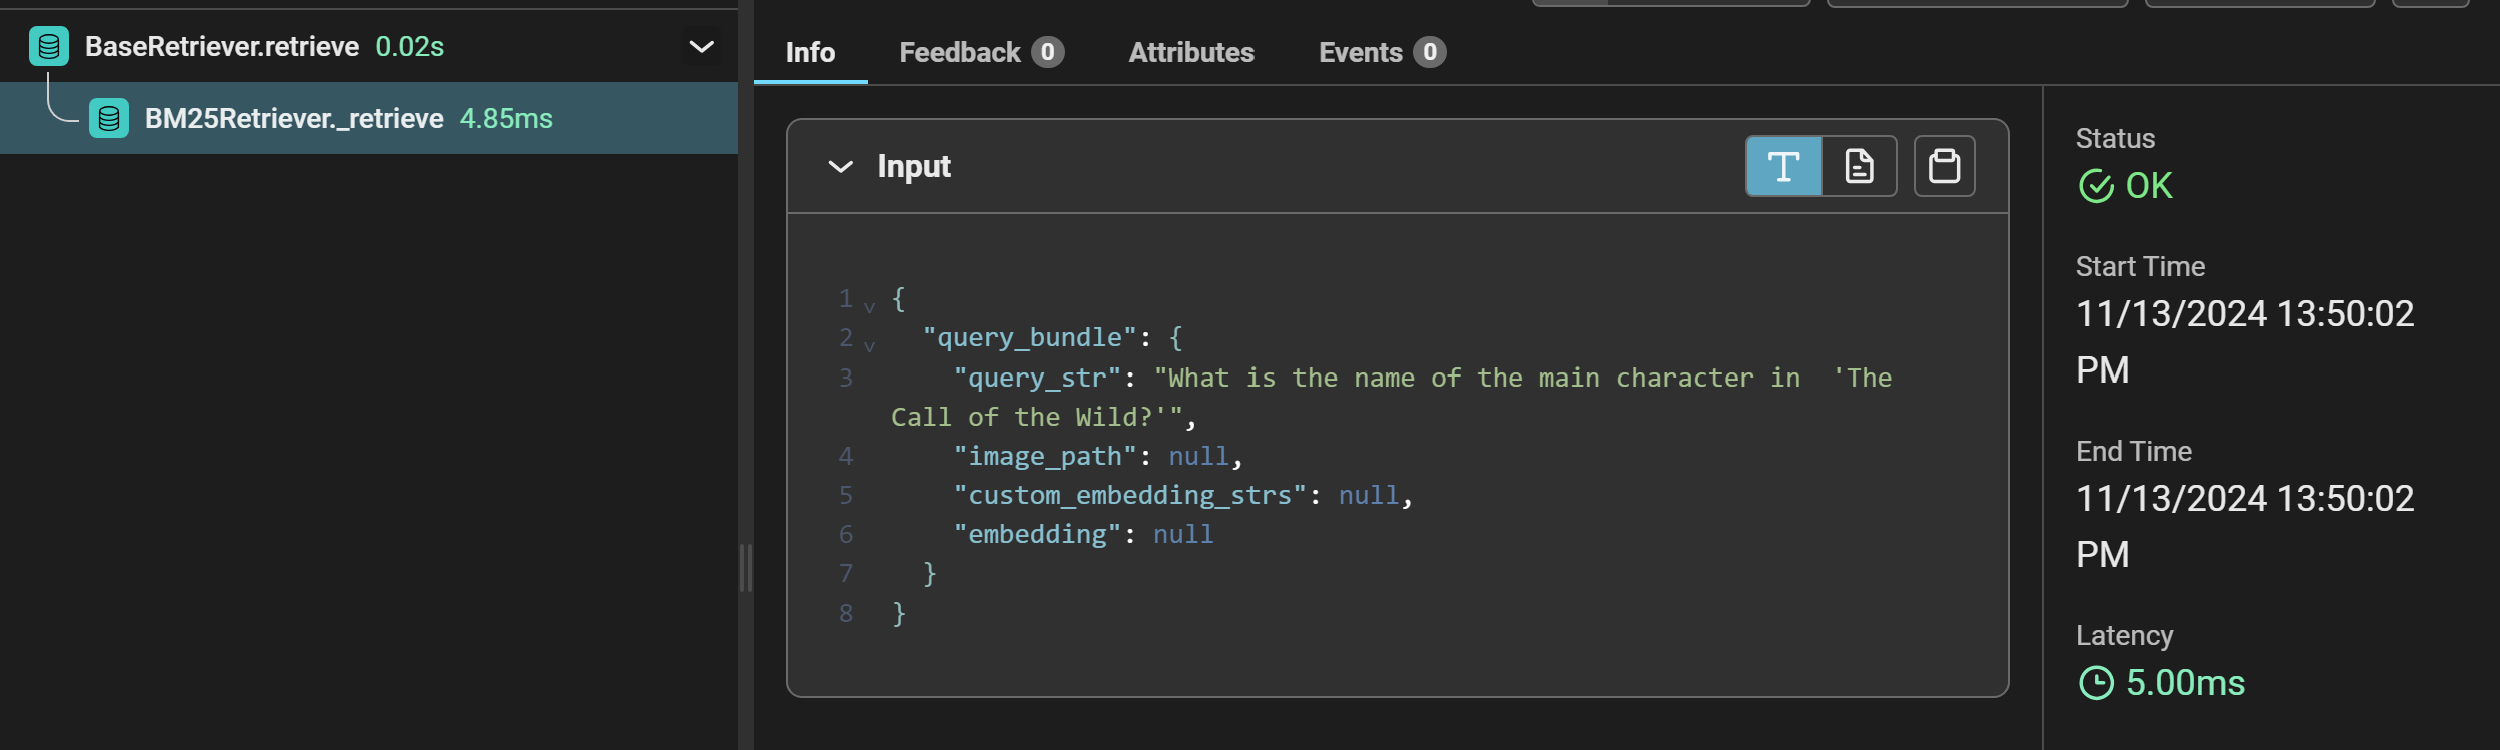

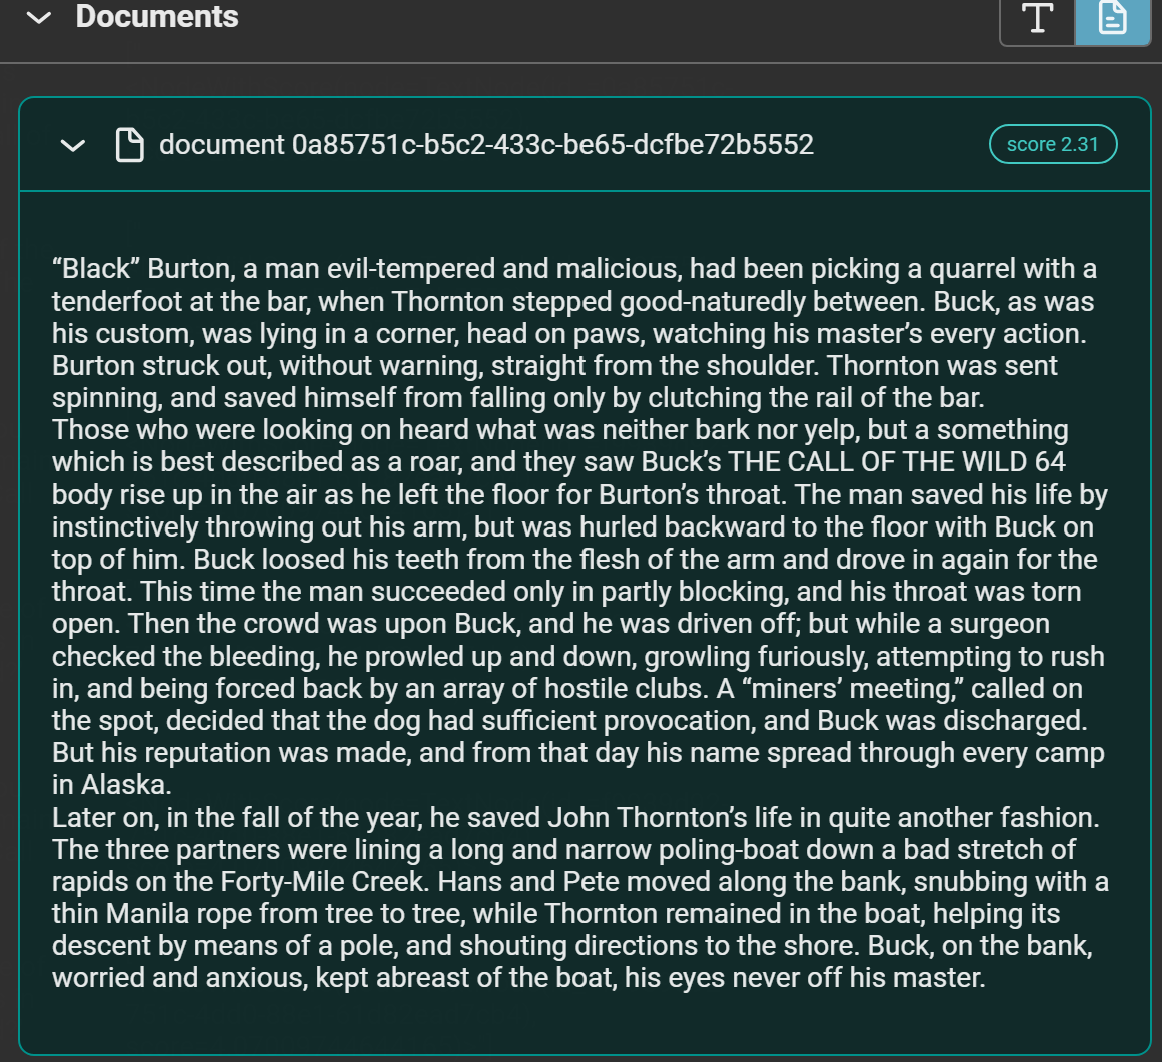

- Первое, что бросается в глаза, это то, что трассируется не LLM, а Retriever. Это связано с использованием BM25, который применяется для извлечения наиболее релевантной информации, которая затем передаётся на обработку LLM.

- На вход подаётся структура `query_bundle`, которая содержит наш запрос в строке `query_str`. А также на входе присутсвует `Document`, который является релевантным фрагментом текста из книги, который наша модель проанализировала и вычленила из него ответ на наш вопрос.

- Модель дала верный ответ, без необходимости использования постобработок, что наглядно демонстрирует, как использование поисковика положительно сказалось на конечных результатах.
